# Topic Modeling: Descubriendo Temáticas en los Comentarios de Facebook

César Quezada Balcazar

## Cargar el archivo
Se extrajeron 1,569 comentarios de septiembre y octubre año 2020 en los que se menciona a CitiBanamex


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
import re
import nltk
import networkx as nx
from networkx.algorithms import community
from nltk.stem import SnowballStemmer
stop_words_sp = set(stopwords.words('spanish'))

In [ ]:
df = pd.read_csv('BanamexFace.csv')
df.head()

,pub,usr,likes,com,fec,hor,sent,tag
0,20200805,Dayana Tinajero,18,"no inventen, acabo de llamar al call center y ...",2020-08-06,11:37:00,n,seguridad
1,20200805,Salma Madrid,5,"pesimo servicio de call center, contestan con ...",2020-08-06,12:56:00,n,atencion_call
2,20200805,Dayana Tinajero,3,"mejor voy a sucursal, ya no me da confianza na...",2020-08-06,13:20:00,n,seguridad
3,20200805,Lissy Jimenez,0,citibanamex podrían decirme dónde puedo llamar...,2020-08-06,16:04:00,o,consulta
4,20200805,Lissy Jimenez,0,citibanamex gracias si me gustaría saber cuand...,2020-08-06,16:23:00,o,consulta


### Removiendo los signos de puntuación


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [ ]:
df['com'] = df['com'].apply(lambda x: remove_punct(x))
df.head()

,pub,usr,likes,com,fec,hor,sent,tag
0,20200805,Dayana Tinajero,18,no inventen acabo de llamar al call center y m...,2020-08-06,11:37:00,n,seguridad
1,20200805,Salma Madrid,5,pesimo servicio de call center contestan con v...,2020-08-06,12:56:00,n,atencion_call
2,20200805,Dayana Tinajero,3,mejor voy a sucursal ya no me da confianza nad...,2020-08-06,13:20:00,n,seguridad
3,20200805,Lissy Jimenez,0,citibanamex podrían decirme dónde puedo llamar...,2020-08-06,16:04:00,o,consulta
4,20200805,Lissy Jimenez,0,citibanamex gracias si me gustaría saber cuand...,2020-08-06,16:23:00,o,consulta


### Unimos todos los comentarios en un documento único



In [ ]:
stop_words_sp

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [ ]:
text = " ".join([term.lower() for term in df.com if term not in stop_words_sp])

In [ ]:
df.head()

,pub,usr,likes,com,fec,hor,sent,tag
0,20200805,Dayana Tinajero,18,no inventen acabo de llamar al call center y m...,2020-08-06,11:37:00,n,seguridad
1,20200805,Salma Madrid,5,pesimo servicio de call center contestan con v...,2020-08-06,12:56:00,n,atencion_call
2,20200805,Dayana Tinajero,3,mejor voy a sucursal ya no me da confianza nad...,2020-08-06,13:20:00,n,seguridad
3,20200805,Lissy Jimenez,0,citibanamex podrían decirme dónde puedo llamar...,2020-08-06,16:04:00,o,consulta
4,20200805,Lissy Jimenez,0,citibanamex gracias si me gustaría saber cuand...,2020-08-06,16:23:00,o,consulta


### Estadísticos básicos de entendimiento

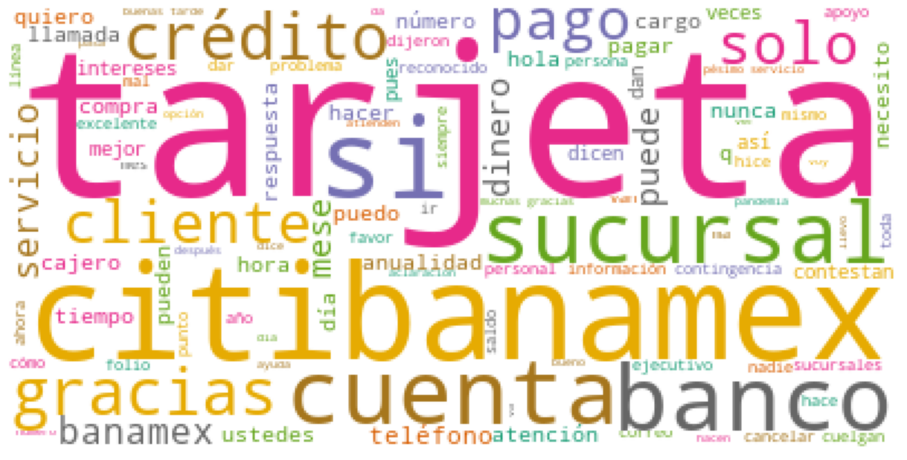

In [ ]:
import wordcloud
from wordcloud import WordCloud
wc= WordCloud(max_words=100, stopwords=stop_words_sp,
              background_color="white", colormap="Dark2",
              max_font_size=100, random_state=6)

plt.figure(figsize=(16, 9))
wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize
fdist = nltk.FreqDist(word.lower() for word in word_tokenize(text) if word not in stop_words_sp)

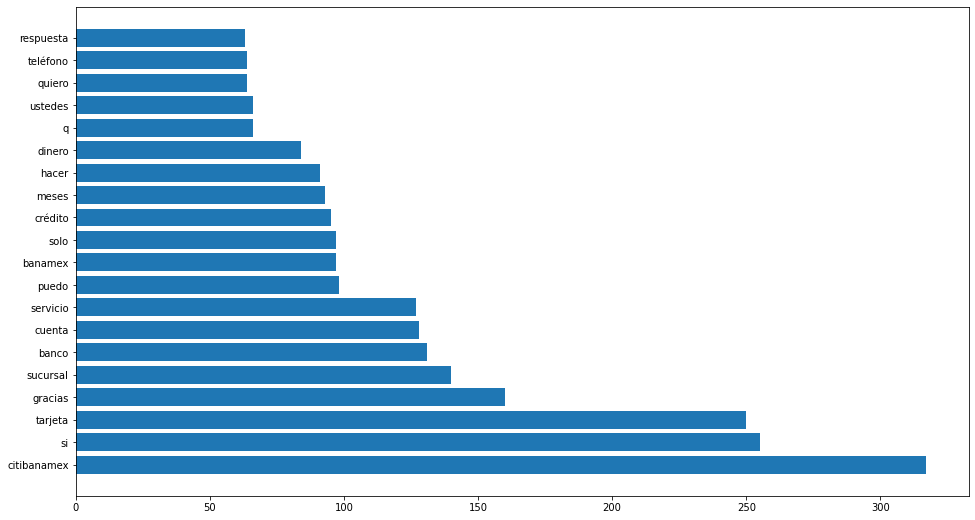

In [ ]:
y = list(range(20))
top_words, counts = zip(*fdist.most_common(20))
plt.figure(figsize=(16, 9))
plt.barh(y, counts)
plt.yticks(y, top_words)
plt.show()

## Análisis de Similitud de Comentarios

Extraemos el campo "com" que contiene el comentario

In [ ]:
comm = df["com"][1:500]
comm.head()

1    pesimo servicio de call center contestan con v...
2    mejor voy a sucursal ya no me da confianza nad...
3    citibanamex podrían decirme dónde puedo llamar...
4    citibanamex gracias si me gustaría saber cuand...
5    tenho um problemas está bloqueada no tarjeta y...
Name: com, dtype: object

#### Creamos la Matriz Término-Documento (TDM) con CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec = CountVectorizer()
X = vec.fit_transform(comm)

In [ ]:
tdm = pd.DataFrame(X.toarray().transpose(), index=vec.get_feature_names())
tdm.columns = comm.index
tdm.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,2,3,4,5,6,7,8,9,10,...,490,491,492,493,494,495,496,497,498,499
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
005717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Calculamos la matriz de correlaciones

In [ ]:
matcor = tdm.corr()
matcor.head()

,1,2,3,4,5,6,7,8,9,10,...,490,491,492,493,494,495,496,497,498,499
1,1.000000,0.033649,0.161090,0.035668,-0.004764,-0.005228,0.263540,0.207236,0.242379,-0.002484,...,0.016419,0.208383,0.187526,0.196904,0.215118,-0.004606,0.414497,0.140458,0.113366,0.145377
2,0.033649,1.000000,0.117787,0.118429,0.115564,-0.006337,0.128873,0.267399,-0.004261,-0.003011,...,0.284184,0.121440,0.129942,0.169803,0.085883,0.263269,0.179062,0.041671,-0.003011,0.272121
3,0.161090,0.117787,1.000000,0.298818,0.057252,-0.006609,0.204332,0.246750,0.252335,0.117838,...,0.168655,0.171456,0.193979,0.150339,0.156203,0.274572,0.211205,0.094416,-0.003141,0.230267
4,0.035668,0.118429,0.298818,1.000000,-0.005495,-0.006030,0.064907,0.279571,0.081476,0.238916,...,0.143888,0.127236,0.107138,0.097646,0.090407,0.162802,0.040765,0.094998,-0.002865,-0.009722
5,-0.004764,0.115564,0.057252,-0.005495,1.000000,0.068902,0.097126,0.131964,-0.003066,-0.002167,...,0.103551,0.059287,0.034839,0.108768,0.040905,0.157795,0.134993,0.068342,-0.002167,0.147129


Transformamos la matriz en un DataFrame de input para el Grafo

In [ ]:
cordf = pd.DataFrame()
cordf = pd.DataFrame(columns = ['inicio', 'fin', 'peso'])
for i in matcor.index:
    for j in matcor.index:
        if i<j:
            try:
                w=matcor.loc[i,j]
                cordf = cordf.append({'inicio' : i, 'fin' : j, 'peso' : w}, ignore_index = True)
            except Exception:
                pass

Filtramos las correlaciones bajas y mostramos las más altas

In [ ]:
cordf = cordf[cordf['peso']>.6]
cordf.sort_values('peso', ascending=False).head(10)

,inicio,fin,peso
92174,246.0,301.0,1.0
38140,84.0,294.0,1.0
23027,49.0,301.0,1.0
23031,49.0,305.0,1.0
23128,49.0,402.0,1.0
23869,51.0,246.0,1.0
23924,51.0,301.0,1.0
23928,51.0,305.0,1.0
24025,51.0,402.0,1.0
22972,49.0,246.0,1.0


Los tweets que tienen correlación 1, tienen exactamente el mismo contenido

In [ ]:
comm[comm.index==51]

51    citibanamex gracias
Name: com, dtype: object

In [ ]:
comm[comm.index==301]

301    citibanamex gracias
Name: com, dtype: object

In [ ]:
comm[comm.index==84]

84    citibanamex si
Name: com, dtype: object

Creamos el Grafo de Relaciones entre Comentarios, para identificar visualmente los que sean similares

In [ ]:
G = nx.from_pandas_edgelist(cordf, source = 'inicio', target = 'fin', edge_attr='peso')
#print(nx.info(G))

Crear la función top_nodes que mostrará los valores más altos de un diccionario

In [ ]:
def get_top_nodes(cdict, num=10):
    top_nodes ={}
    for i in range(num):
        top_nodes =dict(
            sorted(cdict.items(), key=lambda x: x[1], reverse=True)[:num]
            )
        return top_nodes

#### Visualización de Similitud

Guardar el grado de cada nodo en un diccionario

In [ ]:
gdeg=G.degree()
get_top_nodes(dict(gdeg))

{169.0: 19,
 159.0: 13,
 49.0: 11,
 51.0: 11,
 246.0: 11,
 301.0: 11,
 305.0: 11,
 402.0: 11,
 28.0: 11,
 10.0: 8}

Ahora Visualizamos los Tweets, agrupados por similitud

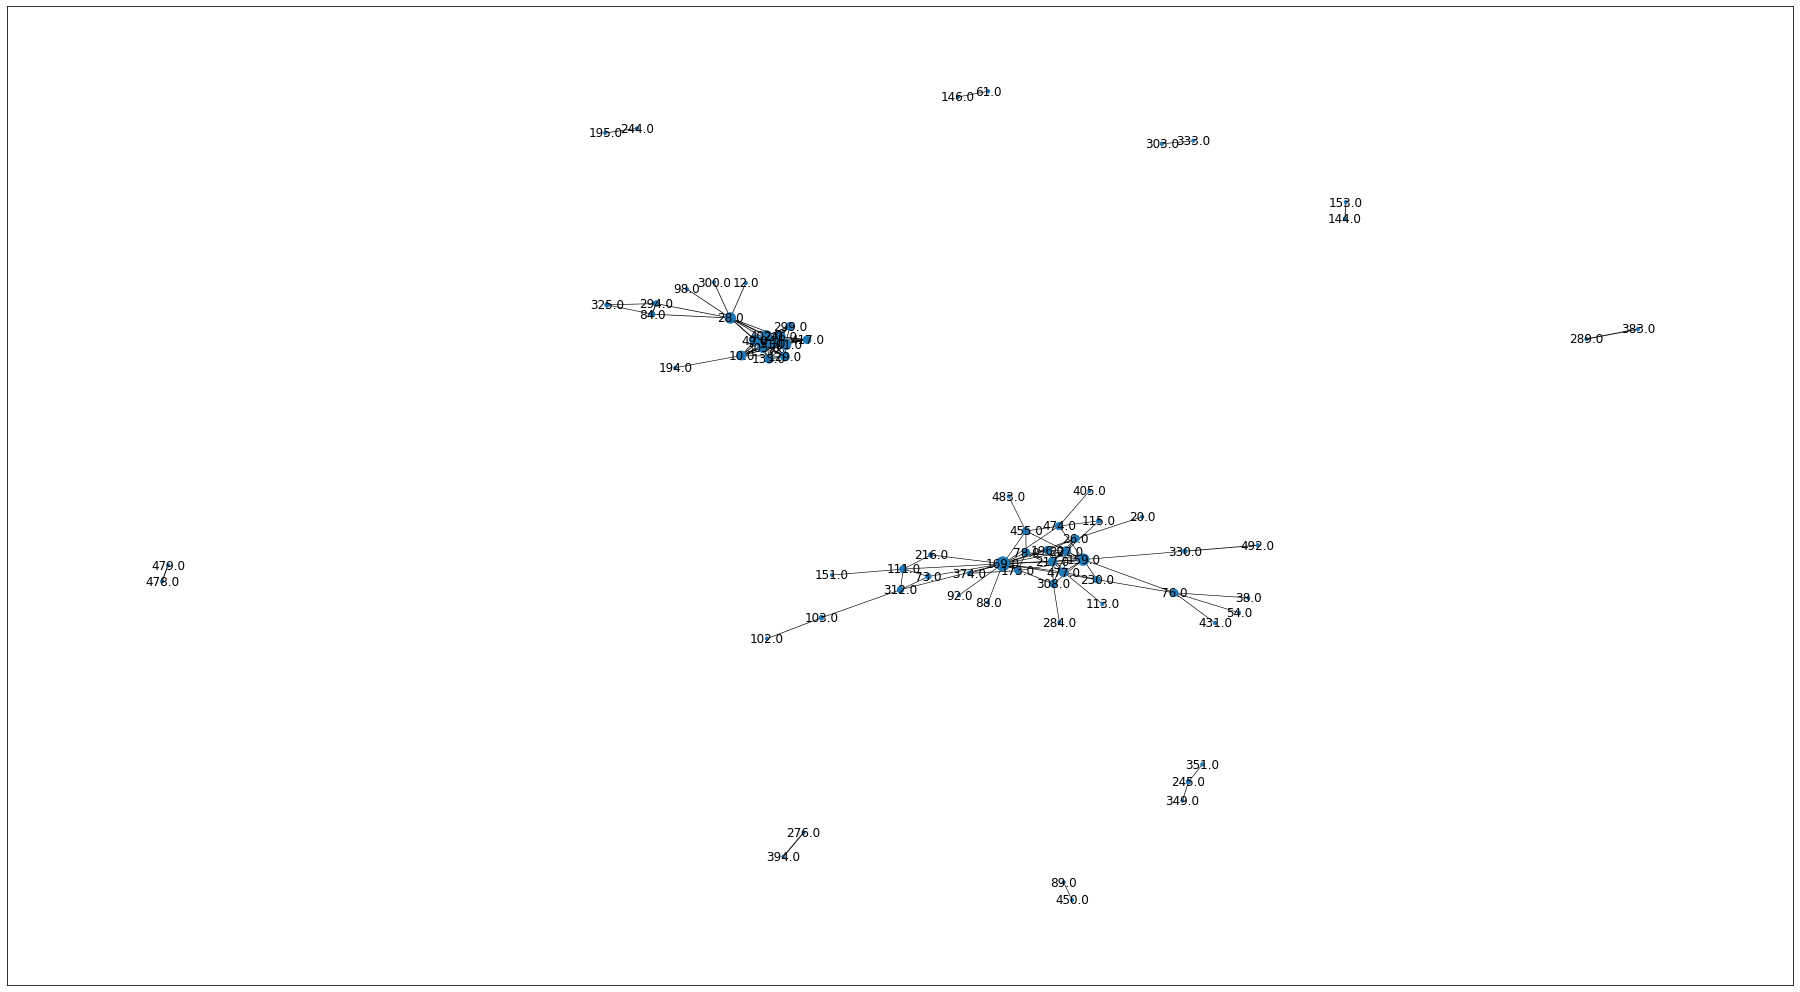

In [ ]:
plt.figure(figsize=(32,18)) 
pos=nx.spring_layout(G)
edges = G.edges()
weights = [G[u][v]['peso'] for u,v in edges]
nx.draw_networkx(G, width=weights, pos=pos, node_size=[val*10 for(node,val)in gdeg])
plt.show()

## Topic Modeling: Descubriendo Temáticas en los Comentarios

#### Limpieza del texto (puntuación, tokenización y eliminado de stopwords en español)

In [ ]:
stemmer = SnowballStemmer("spanish")
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stop_words_sp]
    return text

In [ ]:
df["Tokens"] = df.com.apply(clean_text)
df.head()

,pub,usr,likes,com,fec,hor,sent,tag,Tokens
0,20200805,Dayana Tinajero,18,no inventen acabo de llamar al call center y m...,2020-08-06,11:37:00,n,seguridad,"[inventen, acabo, llamar, call, center, contes..."
1,20200805,Salma Madrid,5,pesimo servicio de call center contestan con v...,2020-08-06,12:56:00,n,atencion_call,"[pesimo, servicio, call, center, contestan, vo..."
2,20200805,Dayana Tinajero,3,mejor voy a sucursal ya no me da confianza nad...,2020-08-06,13:20:00,n,seguridad,"[mejor, voy, sucursal, da, confianza, personas..."
3,20200805,Lissy Jimenez,0,citibanamex podrían decirme dónde puedo llamar...,2020-08-06,16:04:00,o,consulta,"[citibanamex, podrían, decirme, dónde, puedo, ..."
4,20200805,Lissy Jimenez,0,citibanamex gracias si me gustaría saber cuand...,2020-08-06,16:23:00,o,consulta,"[citibanamex, gracias, si, gustaría, saber, ve..."


####  Creamos el diccionario necesario para el modelo LDA

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import random
from wordcloud import WordCloud

In [ ]:
diccionario = Dictionary(df.Tokens)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 4331


Con filter_extremes mantenemos únicamentos los tokens que están mantenidos en al menos no_below documentos y los que están contenidos en no mas de no_above documentos. En este último caso le indicamos una fracción del tamaño del corpus.

In [ ]:
diccionario.filter_extremes(no_below=2, no_above = 0.9)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 1779


Generamos una representación vectorial de los documentos

In [ ]:
corpus = [diccionario.doc2bow(noticia) for noticia in df.Tokens]

print(corpus[6])

[(68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1)]


#### Generamos el modelo LDA

In [ ]:
lda = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=40, random_state=42, 
               chunksize=1000, passes=10, alpha='auto')

In [ ]:
topicos = lda.print_topics(num_words=8, num_topics=15)
for topico in topicos:
    print(topico)

(0, '0.048*"hacer" + 0.040*"seguridad" + 0.038*"d" + 0.036*"falta" + 0.032*"mejor" + 0.030*"ahí" + 0.021*"neta" + 0.021*"señor"')
(19, '0.046*"ejecutivos" + 0.037*"quieren" + 0.031*"estan" + 0.027*"priority" + 0.023*"citibanamex" + 0.021*"dar" + 0.021*"anualidad" + 0.021*"nómina"')
(30, '0.046*"si" + 0.043*"promociones" + 0.043*"ahora" + 0.037*"banco" + 0.032*"entiendo" + 0.028*"calle" + 0.028*"dan" + 0.026*"vía"')
(12, '0.045*"" + 0.032*"sucursal" + 0.031*"tiempo" + 0.028*"solucionar" + 0.028*"puede" + 0.026*"entrar" + 0.024*"paso" + 0.024*"antonio"')
(9, '0.041*"importante" + 0.029*"créditos" + 0.028*"citibanamex" + 0.026*"persona" + 0.024*"corte" + 0.023*"respeto" + 0.023*"esperar" + 0.022*"solo"')
(28, '0.040*"compras" + 0.027*"call" + 0.027*"center" + 0.026*"mismas" + 0.024*"banamex" + 0.024*"tipo" + 0.024*"ve" + 0.015*"afecta"')
(2, '0.038*"cajeros" + 0.028*"esperar" + 0.026*"ahora" + 0.024*"si" + 0.022*"vuelta" + 0.020*"dinero" + 0.020*"dicen" + 0.019*"citibanamex"')
(17, '0.054

Wordcloud de los Tópicos

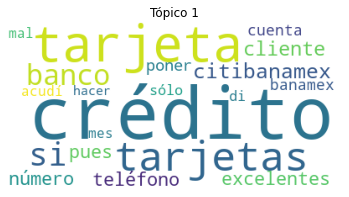

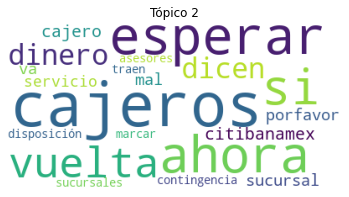

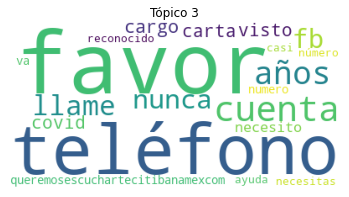

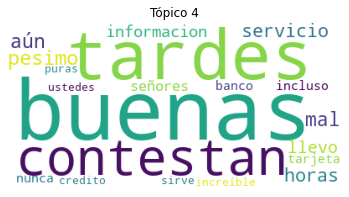

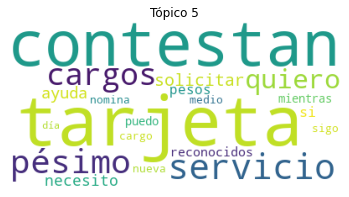

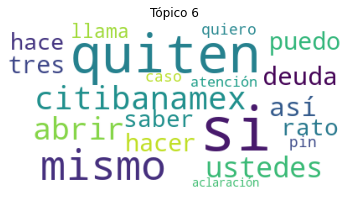

In [ ]:
for i in range(1, 7):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
               .fit_words(dict(lda.show_topic(i, 20))))
    plt.axis("off")
    plt.title("Tópico " + str(i))
    plt.show()

#### Ahora podemos clasificar nuevos comentarios utilizando el modelo LDA generado


In [ ]:
dfs = pd.read_csv('BanamexFaceNew.csv').dropna()
dfs.head()

,pub,usr,likes,com,fec,hor
0,20200918.0,Martin Bernal,0.0,Desde el día 27 de agosto solicité reposición ...,2020-09-20,13:20:00
1,20200918.0,Irma Treviño,0.0,Como localizo mi reposicion de tarjeta citiban...,2020-09-20,10:36:00
2,20200918.0,Francisco León,0.0,"Citibanamex, no me respetaron la promoción del...",2020-09-20,10:20:00
3,20200918.0,Manolo Ruiz Farrera,0.0,Muchísimas gracias citibanamex,2020-09-20,09:57:00
4,20200918.0,Iv San Roman De Proudinat,0.0,Mil gracias por esta platica,2020-09-20,07:28:00


In [ ]:
dfs["Tokens"] = dfs['com'].apply(clean_text)
dfs.head()

,pub,usr,likes,com,fec,hor,Tokens
0,20200918.0,Martin Bernal,0.0,Desde el día 27 de agosto solicité reposición ...,2020-09-20,13:20:00,"[día, 27, agosto, solicité, reposición, tarjet..."
1,20200918.0,Irma Treviño,0.0,Como localizo mi reposicion de tarjeta citiban...,2020-09-20,10:36:00,"[localizo, reposicion, tarjeta, citibanamex, c..."
2,20200918.0,Francisco León,0.0,"Citibanamex, no me respetaron la promoción del...",2020-09-20,10:20:00,"[citibanamex, respetaron, promoción, hot, sale..."
3,20200918.0,Manolo Ruiz Farrera,0.0,Muchísimas gracias citibanamex,2020-09-20,09:57:00,"[muchísimas, gracias, citibanamex]"
4,20200918.0,Iv San Roman De Proudinat,0.0,Mil gracias por esta platica,2020-09-20,07:28:00,"[mil, gracias, platica]"


Identifcando los Tópicos

In [ ]:
bow_articulo_nuevo = diccionario.doc2bow(dfs.Tokens[0])

In [ ]:
# Indices de los topicos mas significativos
dist_indices = [topico[0] for topico in lda[bow_articulo_nuevo]]
# Contribucion de los topicos mas significativos
dist_contrib = [topico[1] for topico in lda[bow_articulo_nuevo]]

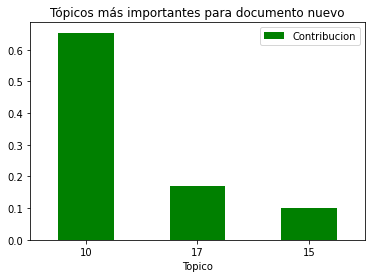

In [ ]:
distribucion_topicos = pd.DataFrame({'Topico':dist_indices,'Contribucion':dist_contrib })
distribucion_topicos.sort_values('Contribucion', ascending=False, inplace=True)
ax = distribucion_topicos.plot.bar(y='Contribucion',x='Topico', rot=0, color="green",
                                   title = "Tópicos más importantes para documento nuevo")

Examinamos los Tópicos

In [ ]:
for ind, topico in distribucion_topicos.iterrows():
    print("*** Tópico: " + str(int(topico.Topico)) + " ***")
    palabras = [palabra[0] for palabra in lda.show_topic(topicid=int(topico.Topico))]
    palabras = ', '.join(palabras)
    print(palabras, "\n")

*** Tópico: 10 ***
sucursal, tarjeta, servicio, teléfono, persona, crédito, veces, 2, si, van 

*** Tópico: 17 ***
respuesta, correo, pueda, citibanamex, si, página, asesor, puede, dice, cuenta 

*** Tópico: 15 ***
hola, cada, tarjeta, puedo, nip, si, línea, secreto, ustedes, tramitar 



Guardamos el modelo y el diccionario.

In [ ]:
lda.save("comentarios.model")
diccionario.save("comentarios.dictionary")